In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [3]:
# to load the dataset in batches
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "../Dataset",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 4305 files belonging to 10 classes.


In [4]:
class_names=dataset.class_names
print(class_names)

['Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


(32, 256, 256, 3)
[3 3 0 4 3 5 1 1 5 2 4 0 3 1 0 4 4 1 1 3 1 1 7 2 3 7 8 8 8 5 0 5]


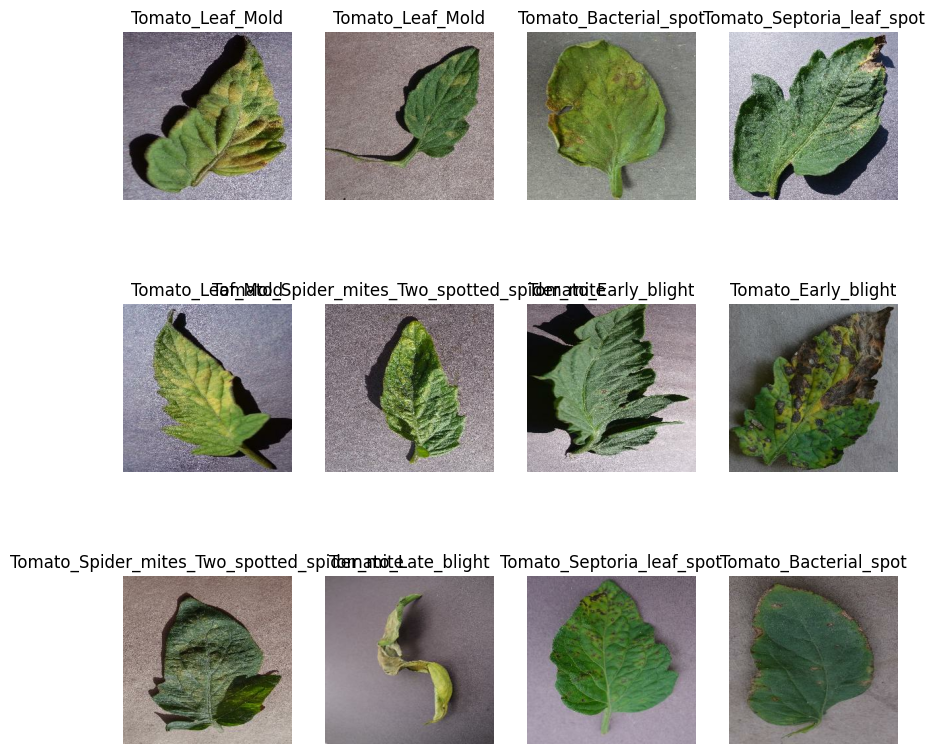

In [11]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [6]:
len(dataset)

135

In [7]:
train_size=0.8
len(dataset)*train_size

108.0

training set 80%
validation set 10%
test set 10%

In [12]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle_size=10000):
    ds_size=len(ds)

    if shuffle_size:
        ds=ds.shuffle(shuffle_size,seed=12)

    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)

    
    return train_ds,val_ds,test_ds
    

In [13]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [10]:
print(len(train_ds),len(val_ds),len(test_ds))

108 13 14


In [14]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [12]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [13]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [14]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=10

model=models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])

model.build(input_shape=input_shape)



In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [16]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [17]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [18]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
108/108 [==============================] - 43s 217ms/step - loss: 2.1785 - accuracy: 0.1791 - val_loss: 1.8272 - val_accuracy: 0.3367
Epoch 2/50
108/108 [==============================] - 17s 154ms/step - loss: 1.5236 - accuracy: 0.4670 - val_loss: 1.2776 - val_accuracy: 0.5810
Epoch 3/50
108/108 [==============================] - 17s 156ms/step - loss: 1.0901 - accuracy: 0.6215 - val_loss: 0.8445 - val_accuracy: 0.7032
Epoch 4/50
108/108 [==============================] - 16s 149ms/step - loss: 0.8831 - accuracy: 0.6918 - val_loss: 0.8044 - val_accuracy: 0.7132
Epoch 5/50
108/108 [==============================] - 16s 150ms/step - loss: 0.7875 - accuracy: 0.7219 - val_loss: 0.8919 - val_accuracy: 0.7007
Epoch 6/50
108/108 [==============================] - 16s 150ms/step - loss: 0.6721 - accuracy: 0.7633 - val_loss: 0.6066 - val_accuracy: 0.7855
Epoch 7/50
108/108 [==============================] - 16s 150ms/step - loss: 0.5607 - accuracy: 0.8006 - val_loss: 0.4888 - val_ac

In [19]:
scores=model.evaluate(test_ds)

14/14 [==============================] - 3s 30ms/step - loss: 0.1815 - accuracy: 0.9799


In [20]:
scores

[0.18149001896381378, 0.9799107313156128]

In [21]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and validation loss')

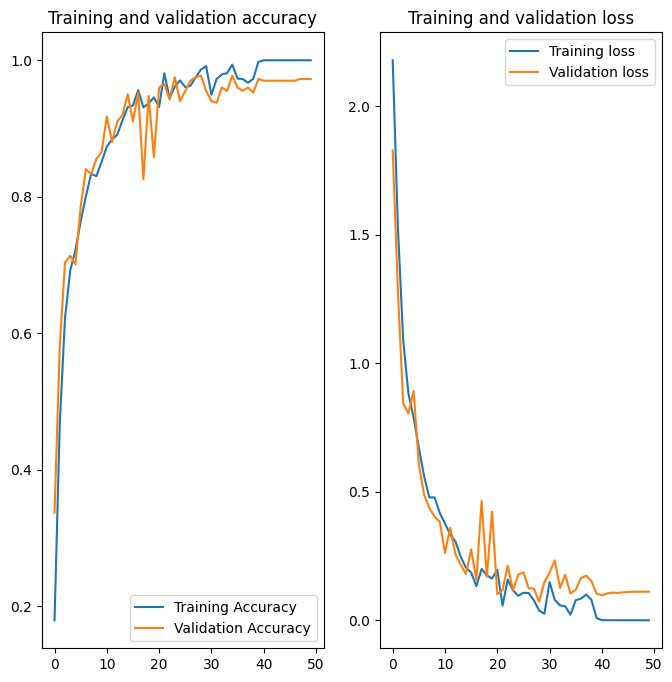

In [24]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc,label="Validation Accuracy")
plt.legend(loc='lower right')
plt.title('Training and validation accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label="Training loss")
plt.plot(range(EPOCHS),val_loss,label="Validation loss")
plt.legend(loc='upper right')
plt.title('Training and validation loss')

In [3]:
import numpy as np

In [24]:
def predict(model,img):

    img_array=tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array,0)  # creating a batch

    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

In [6]:
model = tf.keras.models.load_model("../models/1")

1/1 [==============================] - 0s 23ms/step


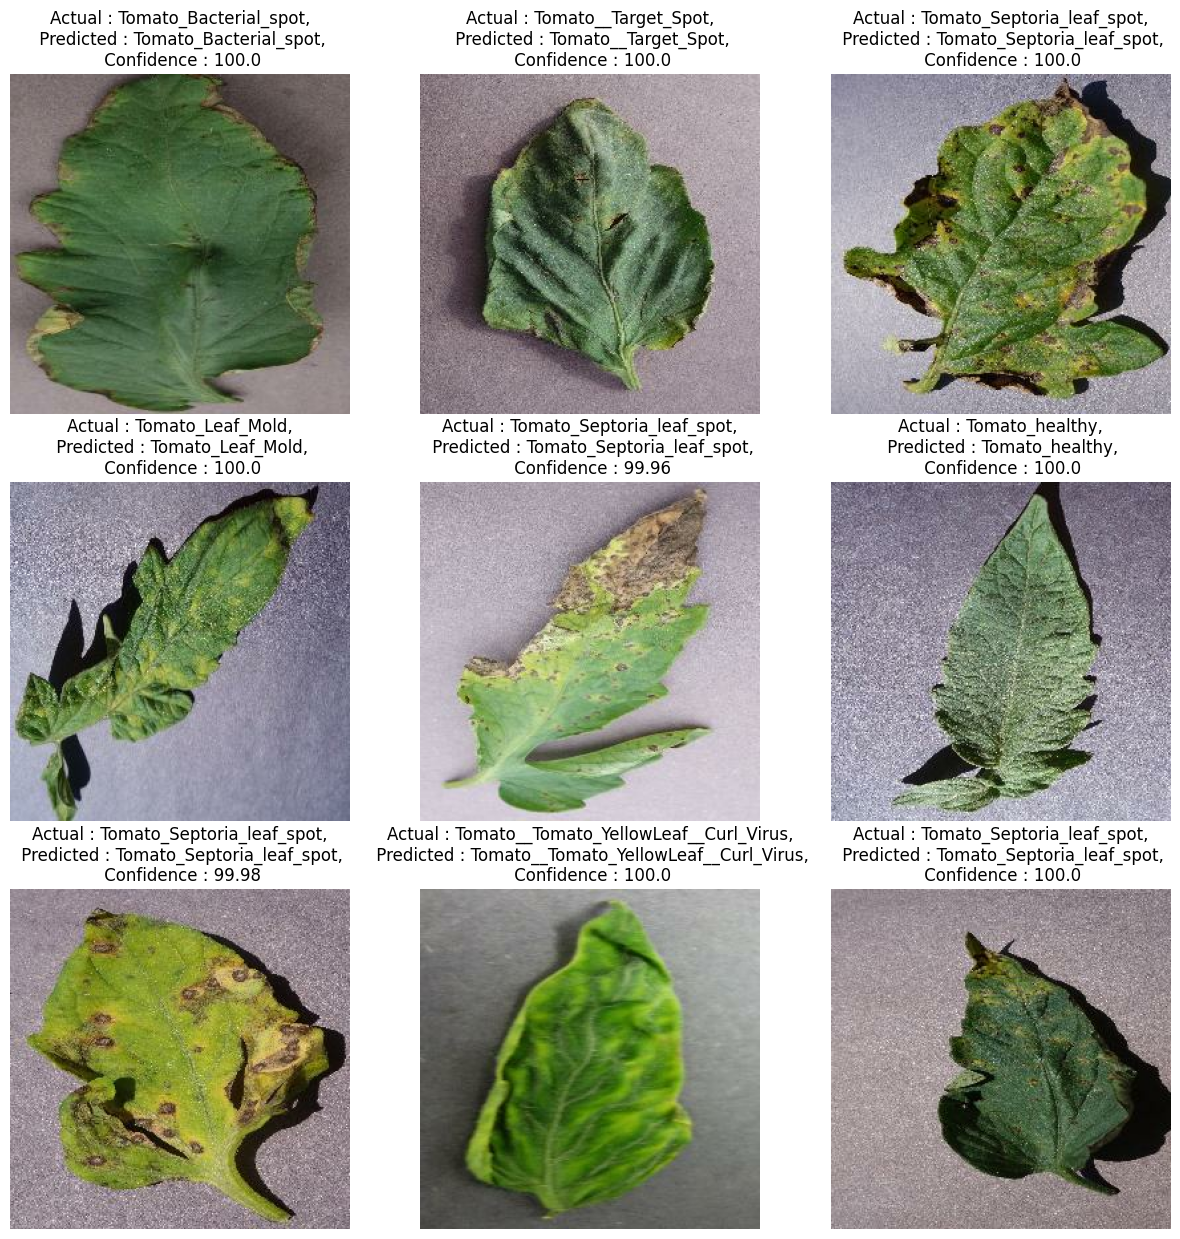

In [25]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]

        plt.title(f"Actual : {actual_class},\n Predicted : {predicted_class},\n Confidence : {confidence}")
        plt.axis("off")

In [26]:
test_loss, test_accuracy = model.evaluate(test_ds)

14/14 [==============================] - 3s 172ms/step - loss: 0.1360 - accuracy: 0.9723


In [27]:
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Test Loss: 0.13596314191818237
Test Accuracy: 0.9722864031791687


In [25]:
model_version=1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets
